<a href="https://colab.research.google.com/github/shrestha94sujan/Image_classification/blob/master/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
print("Hello fren, Welcome to my image classifier!")

Hello fren, Welcome to my image classifier!


In [0]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf


### **Loading the cifar 10 dataset from keras API**

In [0]:
#pre-processing the dataset
#FYI keras dataset comes already pre processed to an extent, so we can use methods like load_data().
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']



### **Plotting the images from the dataset**

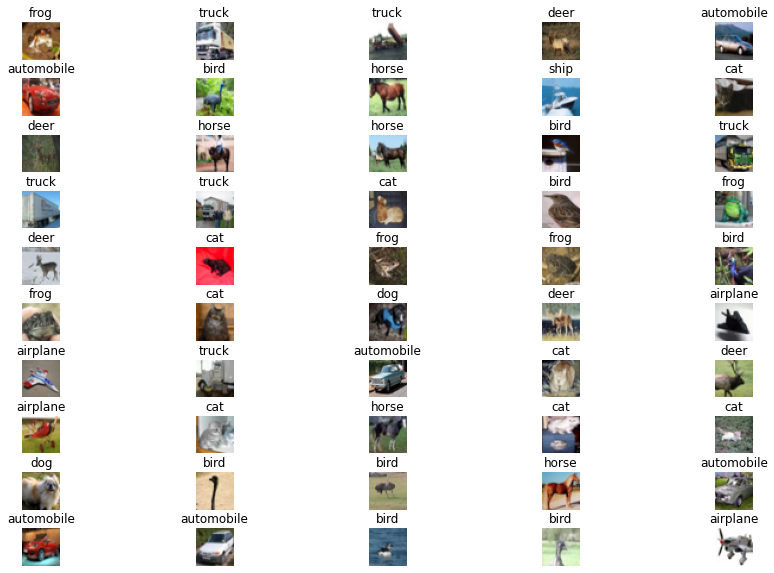

In [0]:
plt.figure(figsize=(15,10))
for i in range(50):
  plt.subplot(10, 5, i + 1)
  plt.subplots_adjust(hspace=0.5)
  plt.imshow(X_train[i])
  plt.axis('off')
  plt.title(class_labels[Y_train[i][0]])
  
#just getting a feel for what kind of dataset i am up against
plt.show()

### **Normalizing the X_train and X_test**
Crucial Step since it makes convergence much faster while training the network!!

In [0]:
X_train = X_train.astype('float32')
X_train = X_train / 255.0

X_test = X_test.astype('float32')
X_test = X_test / 255.0

# Number of images, height, breath, depth of each pixel of images
print(X_train.shape)
# print(X_train[0][0][0])

(50000, 32, 32, 3)


### **One-hot encode**

Important step to get the binary classification of each image, which makes processing a lot faster and easier.

We do this, because an image either belongs to a class of it doesn't. Say in example [0, 0, 1], would mean image belongs to the 3rd class and not first and second!

In [0]:
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

#Number of classes in the dataset
class_num = Y_test.shape[1]

### **Designing our model**

### **1st CNN layer**

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(Activation('relu'))

print(X_train.shape[1:])

(32, 32, 3)


Convention tells us that we have to drop out certain features while training our model to prevent overfitting.

Note: Overfitting is the case when the network learns aspects of the training case too well and fails to generalize to new data. 

In [0]:
model.add(Dropout(0.2))

#Normalize the activations of the previous layer at each batch
model.add(BatchNormalization())


### **2nd CNN layer** 

With increased filter size

In [0]:
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

### **Downscaling the input data**

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

### **3rd CNN layer**

In [0]:
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [0]:
model.add(Flatten())
model.add(Dropout(0.2))

### **Creating the first densely connected layers of neurons**

In [0]:
model.add(Dense(256, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(128, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [0]:
model.add(Dense(class_num))
model.add(Activation('softmax'))


In [0]:
epochs = 5
optimizer = 'adam'


In [0]:
model.compile(loss='categorical_crossentropy', optimizer= optimizer, metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_20 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_21 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)       

In [0]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs)

scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 660s 13ms/step - loss: 1.4182 - accuracy: 0.4960 - val_loss: 1.0272 - val_accuracy: 0.6374
Epoch 2/5
50000/50000 [==============================] - 658s 13ms/step - loss: 1.0090 - accuracy: 0.6427 - val_loss: 0.9715 - val_accuracy: 0.6628
Epoch 3/5
50000/50000 [==============================] - 669s 13ms/step - loss: 0.9358 - accuracy: 0.6713 - val_loss: 0.9681 - val_accuracy: 0.6601
Epoch 4/5
30048/50000 [=================>............] - ETA: 4:15 - loss: 0.8821 - accuracy: 0.6941

In [0]:
plt.figure(figsize=(15,10))
for i in range(50):
  plt.subplot(10, 5, i + 1)
  plt.subplots_adjust(hspace=0.5)
  plt.imshow(X_test[i])
  plt.axis('off')
  plt.title(class_labels[Y_test[i][0]])
  
#just getting a feel for what kind of dataset i am up against
plt.show()